# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [4]:
import pandas as pd

hbt = pd.read_csv('human_body_temperature.csv')

In [67]:
# Your work here.
#importing others
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from scipy.stats import norm
from scipy.stats import normaltest
from statsmodels.stats.weightstats import ztest
from scipy import stats
import math


In [6]:
#Checking the file loaded
hbt.info()
hbt.head()
# 130 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [8]:
#Question 1  - Is the distribution of body temperatures normal?
#One of the best ways to check this is by drawing a graph of 130 entries
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

printmd("**Question 1 - Is the distribution of body temperatures normal?**")


**Question 1 - Is the distribution of body temperatures normal?**

In [18]:
# draw a graph of the temperatures
hbt_sort = hbt.temperature.sort_values()
bin_val = np.arange(start=hbt_sort.min(), stop=hbt_sort.max(), step=.05)
mean_hbt, std_hbt = hbt_sort.mean(),hbt_sort.std()
p=norm.pdf(hbt_sort,mean_hbt,std_hbt)

/Users/abhinavmathur/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


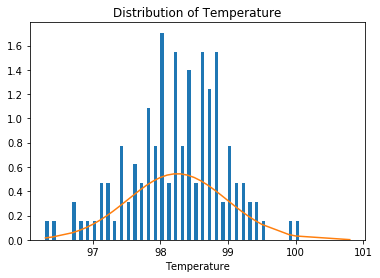

chi-square statistic: 2.703801433319203
p value = 0.2587479863488254


**Answer 1 - As p > Alpha, the distribution is normal**

In [26]:
plt.xlabel('Temperature')
plt.title('Distribution of Temperature')
n,bins,patches= plt.hist(hbt_sort,bins=bin_val,normed=True,stacked=True)
plt.plot(hbt_sort, p)
plt.show()
#Also checking the normalecy using the function
chi_stat, p_val = normaltest(df['temperature'])

print('chi-square statistic:',chi_stat)
print('p value =',p_val)
printmd("**Answer 1 - As p > Alpha, the distribution is normal**")

In [22]:
printmd("**Question 2 - Is the sample size large? Are the observations independent? **")

**Question 2 - Is the sample size large? Are the observations independent? **

In [27]:
# as per CLT, if sample size (n>30) Sample size is large
hbt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [29]:
printmd("**Answer 2 - Since the number of records is > 30, the sample size is large**")

**Since the number of records is > 30, the sample size is large**

In [32]:
printmd("**Question 3 - Is the true population mean really 98.6 degrees F?**")
printmd("First, try a bootstrap hypothesis test.Now, let's try frequentist statistical testing.")
printmd(" Would you use a one-sample or two-sample test? Why?")
printmd("In this situation, is it appropriate to use the  tt  or  zz  statistic?")
printmd("Now try using the other test. How is the result be different? Why?")

**Question 3 - Is the true population mean really 98.6 degrees F?**

First, try a bootstrap hypothesis test.Now, let's try frequentist statistical testing.

 Would you use a one-sample or two-sample test? Why?

In this situation, is it appropriate to use the  tt  or  zz  statistic?

Now try using the other test. How is the result be different? Why?

In [33]:
# One sample test is used when we know that the observations are independent
# Two sample test is used when we are not sure if the observations are independent
# Since we know from #2 that the observations are independent, we will do one sample test
# We use t-statistic when 
# a) the sample observations follow a Normal distribution
# b) the sample size n is large
# c) we do not know the population standard deviation
#hence we will use t -statisitic
scipy.stats.ttest_1samp(hbt_sort,98.6)

Ttest_1sampResult(statistic=-5.454823292364077, pvalue=2.410632041561008e-07)

In [34]:
# p-value can be used to conclude about the true population
#lets say the null hypothesis is that the true population mean is 98.6
# in this case, as p < alpha, we can reject the null hypothesis test 
# this means that the true population means is not 98.6
printmd("The null hypothesis is rejected. The true population mean is not 98.6 degrees F")

The null hypothesis is rejected. The true population mean is not 98.6 degrees F

In [39]:
#lets try using z test
ztest(x1=hbt_sort, value = 98.6)

(-5.454823292364077, 4.902157014113424e-08)

In [40]:
#p value is still less than alpha
# the conclusion remains the same
printmd("From Z test as well, the null hypothesis is rejected. The true population mean is not 98.6 degrees F")

From Z test as well, the null hypothesis is rejected. The true population mean is not 98.6 degrees F

In [42]:
printmd("**Question 4  - Draw a small sample of size 10 from the data and repeat both frequentist tests.**")
printmd("Which one is the correct one to use?")
print("What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic")

**Question 4  - Draw a small sample of size 10 from the data and repeat both frequentist tests.**

Which one is the correct one to use?

What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic


In [55]:
# create a smaller data frame of size 10
hbt_sort_10 = np.random.choice(hbt_sort, size=10)

In [56]:
#conduct t-test and z-test
scipy.stats.ttest_1samp(hbt_sort_10,98.6)

Ttest_1sampResult(statistic=-2.3312939554782623, pvalue=0.04465241249805269)

In [57]:
# z-test
z_stat, p_val = ztest(x1= hbt_sort_10, value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val)

z-statistic: -2.3312939554782623
p value = 0.019737864736624356


In [58]:
#Both the t-test and Z- test were significant
printmd("**Answer 4  - Both the t-tests and z-tests were significant for the given sample**")

**Answer 4  - Both the t-tests and z-tests were significant for the given sample**

In [59]:
printmd("**Question 5  - At what temperature should we consider someone's temperature to be abnormal?**")
printmd("As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.")
printmd("Start by computing the margin of error and confidence interval. ")
printmd("When calculating the confidence interval, keep in mind that you")
printmd("should use the appropriate formula for one draw, and not N draws")

**Question 5  - At what temperature should we consider someone's temperature to be abnormal?**

As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

Start by computing the margin of error and confidence interval. 

When calculating the confidence interval, keep in mind that you

should use the appropriate formula for one draw, and not N draws

In [60]:
# calculating the margin of error
#Margin of error = Critical value x Standard deviation
t_val,p_val= scipy.stats.ttest_1samp(hbt_sort,98.6)
print("T-statistic is",t_val)
print("P-value is",p_val)

T-statistic is -5.454823292364077
P-value is 2.410632041561008e-07


In [66]:
#std_temp = np.std(df['temperature'])
n=len(hbt_sort)
moe=(t_val*np.std(hbt_sort))/np.sqrt(n)
print("Margin of error is",moe)

Margin of error is -0.3494175138693317


In [69]:
#Calculating the confidence interval
conf_int_hbt = stats.norm.interval(alpha=0.95, loc=np.mean(hbt_sort), scale=np.std(hbt_sort))

print('95% confidence interval is ',conf_int_hbt)

95% confidence interval is  (96.81775582674823, 99.6807057117133)


In [71]:
printmd("**Question 6 - Is there a significant difference between males and females in normal temperature?**")
printmd("What testing approach did you use and why?")
printmd("Write a story with your conclusion in the context of the original problem.")

**Question 6 - Is there a significant difference between males and females in normal temperature?**

What testing approach did you use and why?

Write a story with your conclusion in the context of the original problem.

In [72]:
# Since we are comparing two different groups here, we are going to use the two sample test
hbt_male_temps = hbt.temperature[hbt.gender == 'M']
hbt_female_temps = hbt.temperature[hbt.gender == 'F']

print('Mean body temp of male samples: ', np.mean(hbt_male_temps))
print('Mean body temp of female samples: ', np.mean(hbt_female_temps))

g_ttest, g_pval = stats.ttest_ind(a=hbt_male_temps, b=hbt_female_temps, equal_var=False)
print('The T-Statistic is %d with a p-value of %s' %(abs(g_ttest), g_pval))

Mean body temp of male samples:  98.1046153846154
Mean body temp of female samples:  98.39384615384613
The T-Statistic is 2 with a p-value of 0.023938264182934196


In [73]:
#Since p < alpha, it means that our null hypothesis that there is no difference between normal temperatures of males and
#females can be rejected.
# this means that there is statistical difference between normal temperatures of males and females
printmd("There is a statistical difference between normal temperatures of males and females")
printmd("This means that our conclusion for previous questions may have been different if we would have taken samples of either ony males or only females")

There is a statistical difference between normal temperatures of males and females

this means that our conclusion for previous questions may have been different if we would have taken samples of either ony males or only females